In [185]:
import numpy as np
from scipy.stats import expon, chi2, norm

%matplotlib nbagg
import matplotlib.pyplot as plt

In [186]:
def simulate_marginals(dim=2, n_samples=10000, fluffball=True):
    """Simulate the marginal disribution of either a fluffball or soap bubble
    distribution
    
    Args:
        dim: the dimension of the distro
        n_samples: number of samples to draw
        fluffball: boolean that indicates whether to do a
            fluff-ball or a soap-bubble
    Returns:
        a length n_samples-by-dim array of the samples
    """

    # Generate random radii on unit sphere data
    
    if fluffball:
        # simulate exponential
        r_sq = expon.rvs(loc=0, scale=dim, size=n_samples)
    else:
        # simulate chi^2
        r_sq = chi2.rvs(df=dim, size=n_samples)

    # Generate random data on unit sphere data
    coords = np.random.randn(n_samples, dim)
    coords /= np.sqrt(np.mean(coords **2, axis=1, keepdims=True))
    coords *= np.sqrt(r_sq).reshape(-1, 1)

    return coords

<IPython.core.display.Javascript object>


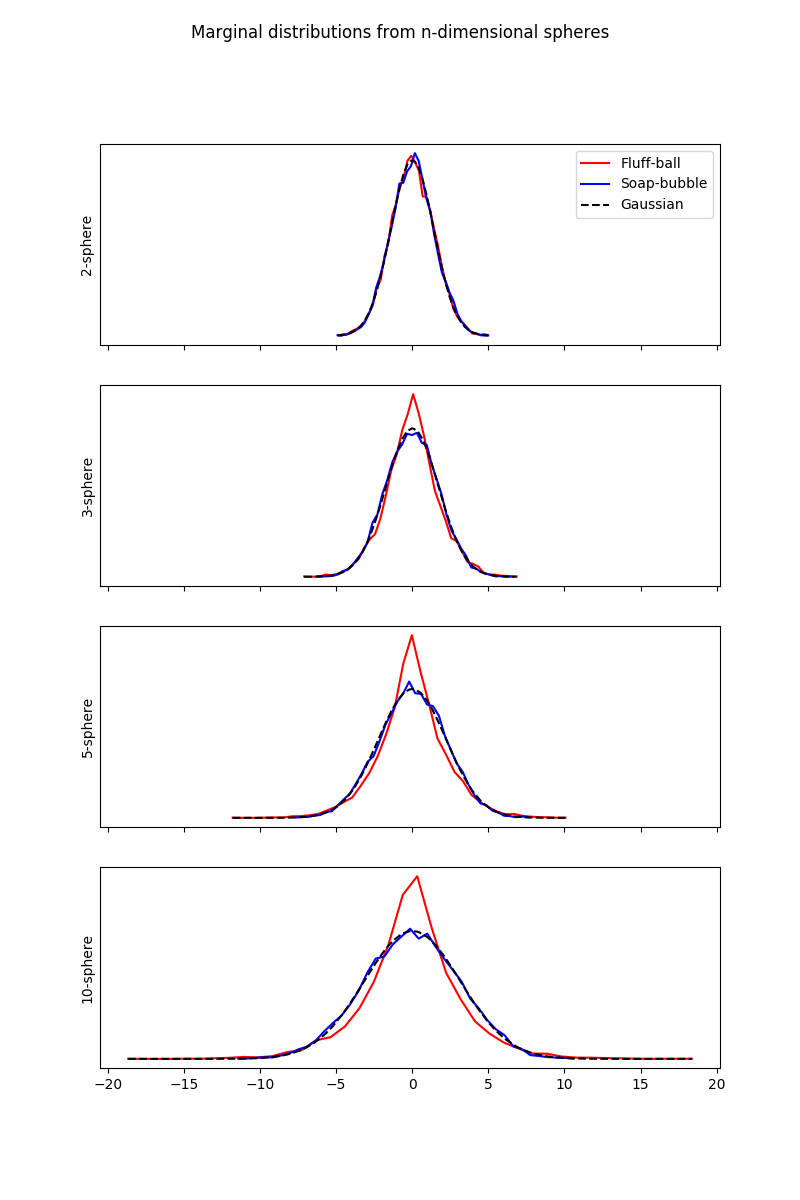

Text(0.5,0.98,'Marginal distributions from n-dimensional spheres')

In [187]:
nsphere_dims = [2, 3, 5, 10]

fig, axes = plt.subplots(len(nsphere_dims), 1, sharex=True, figsize=(8, len(nsphere_dims) * 3))
for row, dim in enumerate(nsphere_dims):
    fluff_distro = simulate_marginals(dim=dim, n_samples=10000, fluffball=True)
    soap_distro = simulate_marginals(dim=dim, n_samples=10000, fluffball=False)

    hist_bins_fluff, edges_fluff = np.histogram(fluff_distro[:, 0], 40, normed=True)
    edges_cent_fluff = 0.5*(edges_fluff[1:] + edges_fluff[:-1])
    axes[row].plot(edges_cent_fluff, hist_bins_fluff, '-r',
                   label='Fluff-ball'.format(dim))

    hist_bins_soap, edges_soap = np.histogram(soap_distro[:, 0], 40, normed=True)
    edges_cent_soap = 0.5*(edges_soap[1:] + edges_soap[:-1])
    axes[row].plot(edges_cent_soap, hist_bins_soap, '-b',
                   label='Soap-bubble'.format(dim))

    edges_full = np.sort(np.hstack([edges_cent_fluff, edges_cent_soap]))
    axes[row].plot(edges_full, [norm.pdf(x, 0, np.sqrt(dim)) for x in edges_full], '--k',
                   label='Gaussian'.format(dim))
    
    axes[row].get_yaxis().set_ticks([])
    axes[row].set_ylabel('{}-sphere'.format(dim))
    if row == 0:
        axes[row].legend()

fig.suptitle('Marginal distributions from n-dimensional spheres')